In [1]:
C2K = list()
C2K.append('session_id')
C2K.append('tutor_id')
C2K.append('student_id')
C2K.append('timestamp')
C2K.append('feedback_score')
C2K.append('wait_time')
C2K.append('ended_by_reason')
C2K.append('session_category')
C2K.append('consolidated_session_category')
C2K.append('student_complained')
C2K.append('student_complaint_clarity')
C2K.append('student_complaint_speed')
C2K.append('student_complaint_subject')
C2K.append('student_complaint_other')
C2K.append('session_tag_cheating')
C2K.append('session_tag_inappropriate')
C2K.append('session_tag_other_subject')
C2K.append('session_tag_no_material')
C2K.append('session_tag_student_left')
C2K.append('session_tag_student_not_engaging')
C2K.append('session_tag_used_whiteboard')
C2K.append('student_rating')
C2K.append('length_of_session')
C2K.append('avg_tutor_response_time')
C2K.append('max_tutor_response_time')
C2K.append('subject')
C2K.append('subtopic')
C2K.append('rubric_version')
C2K.append('tutor_gender')
C2K.append('tutor_international_name')
C2K.append('tutor_fired')
C2K.append('tutor_math_exam_score')
C2K.append('tutor_physics_exam_score')
C2K.append('tutor_chemistry_exam_score')
C2K.append('tutor_last_sign_in_country')
C2K.append('tutor_age')
C2K.append('student_platform')
C2K.append('student_app_version')
C2K.append('student_transactions_amount')

In [2]:
# dict es una estructura  de datos denominada dictionary,permite construir valores de clave,valor
T2F = dict()
T2F['tutor_id'] = pd.Int64Dtype()
T2F['timestamp'] = 'datetime64[ns, UTC]'
T2F['student_rating'] = pd.Int64Dtype()
T2F['tutor_fired'] = bool
T2F['tutor_age'] = pd.Int64Dtype()

In [3]:
# importación de las librerías
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving datadump.csv to datadump.csv
User uploaded file "datadump.csv" with length 24493459 bytes


In [5]:

df = pd.read_csv('datadump.csv')
display(df.shape)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (27,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(63265, 111)

Preprocesamiento o curación de la metadata


In [6]:
# Remuevo espacios al inicio y final del nombre de la columna
df.columns = [column.strip() for column in df.columns]

# Tomo solo las columnas que vamos a necesitar
df = df[C2K]

# Se corrigen los tipos de los datos 
df = df.astype(T2F)

display(df.shape)

(63265, 39)

Descripción inicial de los datos


In [7]:
# Obtenemos la cantidad de filas con tutor sin identificación (tutor_id nulo)
nrows_tutor_nan  = df['tutor_id'].isnull().sum()

# Cantidad de filas total
nrows = df.shape[0]

# Cantidad de tutores identificados
n_tutors = df.dropna(subset=['tutor_id'])['tutor_id'].unique().shape[0]


print ('Cantidad de filas con tutor no identificado: {} de {}'.format(nrows_tutor_nan,nrows))
print ('Porcentaje de filas con tutor identificado: {:.2%}'.format(1 - nrows_tutor_nan/nrows))
print ('Cantidad de tutores (identificados): {}'.format(n_tutors))

Cantidad de filas con tutor no identificado: 4749 de 63265
Porcentaje de filas con tutor identificado: 92.49%
Cantidad de tutores (identificados): 149


Caracterización de los tutores por sexo

In [8]:
#1
df_tutors = df.dropna(subset=['tutor_id'])[['tutor_id', 'tutor_gender', 'tutor_age','tutor_last_sign_in_country']]
df_tutors


,tutor_id,tutor_gender,tutor_age,tutor_last_sign_in_country
0,18172,male,52,IN
1,283248,male,19,USA
2,8593,male,52,IN
3,283248,male,19,USA
4,43182,female,42,IN
...,...,...,...,...
63260,279250,male,22,PH
63261,24352,male,52,IN
63262,34864,male,52,IN
63263,710855,NaN,29,PH


Elimino los que tienen NA en el sexo del tutor y elimino los duplicados


In [9]:
#2 
df_tutors_by_gender = df_tutors.dropna(subset=['tutor_gender'])  #eliminó los que tienen NA en el campo sexo
df_tutors_by_gender = df_tutors_by_gender.drop_duplicates().sort_values(by='tutor_id')  #elimino los duplicados
df_tutors_by_gender

df_tutors_by_gender.shape[0]

136

**Gráfico con cantidad de tutores por sexo**

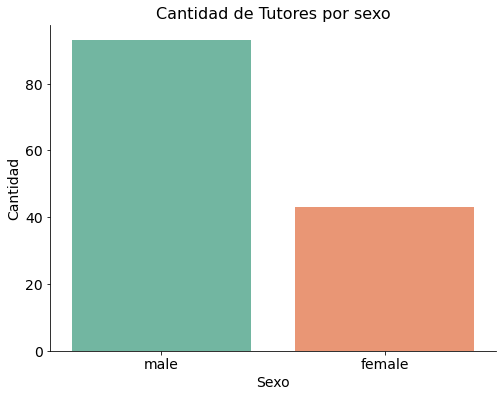

In [43]:
color_palette = ('#9ccfb1','#713580')
fig1, ax1 = plt.subplots(figsize=(8,6))
sns.countplot(x = df_tutors_by_gender['tutor_gender'], palette='Set2')
plt.title('Cantidad de Tutores por sexo', fontsize=16)
plt.xlabel('Sexo', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()
plt.show()


#sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
#ax1.axhline(0, color="k", clip_on=False)
#ax1.set_ylabel("Sequential")

In [54]:
import pandas as pd
# promedio de edad por sexo
average_age_x_sex= df_tutors_by_gender.groupby('tutor_gender').tutor_age.mean()
# mediana
median_age_x_sex= df_tutors_by_gender.groupby('tutor_gender').tutor_age.median()
#print(median_age_x_sex)
# moda, ¿Mayormente cuál es la edad de tutores hombres y cuál de mujeres? 
moda_male= df_tutors_by_gender[(df_tutors_by_gender.tutor_gender == 'male')].tutor_age.mode()
moda_female= df_tutors_by_gender[(df_tutors_by_gender.tutor_gender == 'female')].tutor_age.mode()
#moda_age_x_sex= df_tutors_by_gender.groupby('tutor_gender').tutor_age.mode()


print('El Promedio de edad de tutores por sexo es para mujeres de:', round(average_age_x_sex.iloc[0],1), 'y para hombres de:', round(average_age_x_sex.iloc[1],1), 'años.')
print('\nLa mediana respecto a la edad para tutores hombres es', round(median_age_x_sex.iloc[1],1), 'y para mujeres:',round(median_age_x_sex.iloc[0],1),'años.')
print('\nModa en cuanto a la edad de tutores por sexo para hombres:', round(moda_male.iloc[0],1), 'y para mujeres:',round(moda_female.iloc[0],1),'años.')


El Promedio de edad de tutores por sexo es para mujeres de: 31.7 y para hombres de: 28.1 años.

La mediana respecto a la edad para tutores hombres es 23 y para mujeres: 27 años.

Moda en cuanto a la edad de tutores por sexo para hombres: 22 y para mujeres: 52 años.


**Porcentaje de tutores por sexo**





In [ ]:
total= df_tutors_by_gender.tutor_id.count()


n_male= df_tutors_by_gender[(df_tutors_by_gender.tutor_gender == 'male')].tutor_id.count()
n_female= df_tutors_by_gender[(df_tutors_by_gender.tutor_gender == 'female')].tutor_id.count()

print ('Cantidad de tutores hombres: {}'.format(n_male))
print ('Cantidad de tutores mujeres: {}'.format(n_female))

print ('Porcentaje de tutores hombres: {:.2%}'.format(n_male/total))
print ('Porcentaje de tutores mujeres: {:.2%}'.format(n_female/total))

Luego de eliminar del dataset los tutores cuyo sexo no estaba imputado, se evidencia que de un total de 136 tutores más del 60 % son hombres y que la edad promedio de estos es de 28 años, mientras que de las mujeres es 32 años. Al calcular la mediana también se evidencia que los tutores hombres son más jovenes que sus colegas mujeres. Además, si tenemos  en cuenta la moda hay más hombres de 22 años, y más mujeres 52.

**Caracterización de los tutores: Distribución geográfica**
1. Importamos la librería necesaria para estandarizar el nombre y códigos de los países
1. Removemos las filas con información nula en country 
1. Removemos las filas con información no definida ('--') en country
1. Agregamos una columna con el código y el nombre del país normalizados
1.Totalizamos por pais




In [48]:

!pip install -q pycountry   #para instalar paquete faltante
import pycountry as pyco


     |████████████████████████████████| 10.0MB 3.3MB/s 


In [49]:
# 2 Removemos las filas con información nula en country
df_tutors_by_country = df_tutors.dropna(how='any',subset=['tutor_last_sign_in_country'],axis=0)
df_tutors_by_country = df_tutors_by_country.drop_duplicates().sort_values(by='tutor_id')

# 3 Removemos las filas con información no definida ('--') en country
df_tutors_by_country =  df_tutors_by_country[df_tutors['tutor_last_sign_in_country']!='--']

# 4
df_tutors_by_country['country'] = df_tutors_by_country.apply(lambda row: (pyco.countries.lookup(row.tutor_last_sign_in_country)).name, axis = 1) 
df_tutors_by_country['country_alpha_3'] = df_tutors_by_country.apply(lambda row: (pyco.countries.lookup(row.tutor_last_sign_in_country)).alpha_3, axis = 1) 
df_tutors_by_country['country_alpha_2'] = df_tutors_by_country.apply(lambda row: (pyco.countries.lookup(row.tutor_last_sign_in_country)).alpha_2, axis = 1) 

# 5
df_tutors_by_country = df_tutors_by_country [['country','country_alpha_2','country_alpha_3', 'tutor_gender', 'tutor_id']]
df_tutors_by_country['count'] = df_tutors_by_country.groupby('country')['country'].transform('count')
df_tutors_by_country = df_tutors_by_country.drop_duplicates().sort_values(by='country')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


**Caracterización de tutores por país y sexo.**

In [50]:
#average_age_x_sex= df_tutors_by_gender.groupby('country').tutor_age.mean()
tutores_x_pais_sexo= df_tutors_by_country.groupby(['country', 'tutor_gender'])[['tutor_id']].count()
print(tutores_x_pais_sexo)



                                     tutor_id
country                tutor_gender          
Argentina              male                 1
Bosnia and Herzegovina female               1
Canada                 male                 1
Colombia               male                 1
Croatia                male                 1
France                 female               1
Ghana                  male                 1
Hungary                male                 1
India                  female               5
                       male                16
Jamaica                female               1
                       male                 1
Korea, Republic of     female               1
Pakistan               male                 2
Philippines            female               6
                       male                12
Singapore              male                 1
United Kingdom         male                 3
United States          female              24
                       male       

De acuerdo al cálculo anterior podemos observar que en los 10 primeros países con mayor concentración de tutores existe una brecha entre hombres y mujeres. Si tomamos los tres primeros países con mayor cantidad de tutores: Estados Unidos(con 24 muj. y 46 hombres), Filipinas (muj. 6 y hom. 12) e India (con 5 muj. y 16 hombres) vemos como las mujeres representan aproximadamente tan solo entre el 23% y 34 % del total de tutores. 